In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gc
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv

In [2]:
# load the new file
df = read_csv('./data/bitcoin_data.csv', date_parser = True)
df.drop(df.columns[0], axis=1,inplace = True)
len(df)

19468

In [3]:
df = df[df['NewDateTime']>= '2021-01-01'].copy()
len(df)

8206

In [4]:
# df.drop(df.head(len(df)%168).index,inplace=True)
# len(df)

In [5]:
int(len(df)/8*7)

7180

In [6]:
data_training = df.iloc[0:int(len(df)/8*7),:]
data_test = df.iloc[int(len(df)/8*7):int(len(df)),:]

len(data_training)

7180

In [7]:
training_data = data_training.drop(['NewDateTime'], axis = 1)


training_data

,close,open,high,low,Volume BTC,returns,log_returns,SOPR,fundingRate,googleTrend
11262,28995.13,28923.63,29031.34,28690.17,2311.811445,1.002472,0.002469,1.041846,0.0367,38
11263,29409.99,28995.13,29470.00,28960.35,5403.068471,1.014308,0.014207,1.041846,0.0367,36
11264,29194.65,29410.00,29465.26,29120.03,2384.231560,0.992678,-0.007349,1.041846,0.0367,34
11265,29278.40,29195.25,29367.00,29150.02,1461.345077,1.002869,0.002865,1.041846,0.0367,33
11266,29220.31,29278.41,29395.00,29029.40,2038.046803,0.998016,-0.001986,1.041846,0.0367,32
...,...,...,...,...,...,...,...,...,...,...
18437,59029.03,58564.00,59091.84,58270.00,2793.149050,1.007941,0.007909,0.998682,0.0331,70
18438,59012.57,59031.50,59324.90,58899.70,2007.475280,0.999721,-0.000279,0.998682,0.0331,70
18439,59162.25,59012.57,59449.00,58709.08,2394.305750,1.002536,0.002533,0.998682,0.0331,70
18440,58819.14,59162.25,59360.20,58758.00,2149.769660,0.994201,-0.005816,0.998682,0.0331,70


In [15]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.        , 0.        , 0.        , ..., 0.85604275, 0.37330183,
        0.27058824],
       [0.01095175, 0.00188395, 0.01155321, ..., 0.85604275, 0.37330183,
        0.24705882],
       [0.00526706, 0.01281533, 0.01142837, ..., 0.85604275, 0.37330183,
        0.22352941],
       ...,
       [0.79637177, 0.79281128, 0.80112545, ..., 0.41470725, 0.36266982,
        0.64705882],
       [0.78731412, 0.79675518, 0.79878668, ..., 0.41470725, 0.36266982,
        0.64705882],
       [0.78859894, 0.78771487, 0.7910395 , ..., 0.41470725, 0.35440047,
        0.64705882]])

In [16]:
X_train = []
Y_train = []

In [17]:
training_data.shape

(7180, 10)

In [18]:
for i in range(168, training_data.shape[0],8):
    X_train.append(training_data[i-168:i])
    Y_train.append(training_data[i])

In [19]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [20]:
X_train.shape

(877, 168, 10)

In [21]:
Y_train.shape

(877, 10)

In [22]:
Y_train[1,0]

0.2548479832738043

In [23]:
X_train[2,167,0]

0.3124005100222541

In [24]:
# Y_train=Y_train.reshape(Y_train.shape[0],24,1)

In [25]:
# Y_train[1,:,0]

In [26]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout,RepeatVector,TimeDistributed

In [27]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 10)))
model.add(Dropout(0.1))
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.1))
# model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
# model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(units =10))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 168, 50)           12200     
_________________________________________________________________
dropout (Dropout)            (None, 168, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 168, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 168, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 80)                45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                8

In [29]:
model.compile(loss='mse', optimizer='adam')

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.1)

Train on 789 samples, validate on 88 samples
Epoch 1/10


In [29]:
import tensorflow as tf
model = tf.keras.models.load_model('168_1.h5')

In [30]:
model.save("168_1.h5")

In [31]:
# result = model.predict(X_train, batch_size=128, verbose=0)
# for value in result[0,:,0]:
# 	print('%.1f' % value)

In [32]:
loss = history.history['loss']
epoch = range(len(loss))
# plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

NameError: name 'history' is not defined

In [33]:
history.history

NameError: name 'history' is not defined

In [34]:
# from tensorflow import keras
# regressor = Sequential()
# regressor = keras.models.load_model("LSTM_model_1210.h5")

In [35]:
past_weeks = data_training.tail(168)
df= past_weeks.append(data_test, ignore_index = True)
# test.drop(test.tail(len(test)%168).index,inplace=True)
# test = test.drop(['NewDateTime'], axis=1)
df

,close,open,high,low,Volume BTC,NewDateTime,returns,log_returns,SOPR,fundingRate,googleTrend
0,66363.02,66449.01,66538.61,66104.32,2434.60668,2021-10-20 17:00:00,0.998706,-0.001295,1.009247,0.01,100
1,66644.01,66363.02,66700.00,66323.27,1671.16055,2021-10-20 18:00:00,1.004234,0.004225,1.009247,0.01,100
2,66397.59,66644.00,66700.00,66238.00,1722.61368,2021-10-20 19:00:00,0.996302,-0.003704,1.009247,0.01,100
3,66002.03,66397.60,66444.47,65662.95,2444.83825,2021-10-20 20:00:00,0.994043,-0.005975,1.009247,0.01,100
4,65807.50,65993.78,66064.90,65567.00,1289.63837,2021-10-20 21:00:00,0.997053,-0.002952,1.009247,0.01,100
...,...,...,...,...,...,...,...,...,...,...,...
1189,49620.68,49767.77,49874.47,49477.00,1150.77841,2021-12-09 06:00:00,0.997044,-0.002960,0.996332,0.01,23
1190,50016.89,49620.69,50350.00,49184.49,1981.99757,2021-12-09 07:00:00,1.007985,0.007953,0.996332,0.01,25
1191,49511.54,50016.86,50016.89,49215.74,1339.34458,2021-12-09 08:00:00,0.989896,-0.010155,0.996332,0.01,29
1192,49206.95,49511.54,49540.01,48898.00,2016.55157,2021-12-09 09:00:00,0.993848,-0.006171,0.996332,0.01,39


In [36]:
past_weeks

,close,open,high,low,Volume BTC,NewDateTime,returns,log_returns,SOPR,fundingRate,googleTrend
18274,66363.02,66449.01,66538.61,66104.32,2434.60668,2021-10-20 17:00:00,0.998706,-0.001295,1.009247,0.0100,100
18275,66644.01,66363.02,66700.00,66323.27,1671.16055,2021-10-20 18:00:00,1.004234,0.004225,1.009247,0.0100,100
18276,66397.59,66644.00,66700.00,66238.00,1722.61368,2021-10-20 19:00:00,0.996302,-0.003704,1.009247,0.0100,100
18277,66002.03,66397.60,66444.47,65662.95,2444.83825,2021-10-20 20:00:00,0.994043,-0.005975,1.009247,0.0100,100
18278,65807.50,65993.78,66064.90,65567.00,1289.63837,2021-10-20 21:00:00,0.997053,-0.002952,1.009247,0.0100,100
...,...,...,...,...,...,...,...,...,...,...,...
18437,59029.03,58564.00,59091.84,58270.00,2793.14905,2021-10-27 12:00:00,1.007941,0.007909,0.998682,0.0331,70
18438,59012.57,59031.50,59324.90,58899.70,2007.47528,2021-10-27 13:00:00,0.999721,-0.000279,0.998682,0.0331,70
18439,59162.25,59012.57,59449.00,58709.08,2394.30575,2021-10-27 14:00:00,1.002536,0.002533,0.998682,0.0331,70
18440,58819.14,59162.25,59360.20,58758.00,2149.76966,2021-10-27 15:00:00,0.994201,-0.005816,0.998682,0.0331,70


In [37]:
df = df.drop(['NewDateTime'], axis = 1)
len(df)

1194

In [38]:
inputs = scaler.transform(df)
inputs

array([[0.9864625 , 0.98875349, 0.98784814, ..., 0.52272693, 0.29444773,
        1.        ],
       [0.99388026, 0.98648774, 0.99209875, ..., 0.52272693, 0.29444773,
        1.        ],
       [0.9873751 , 0.99389126, 0.99209875, ..., 0.52272693, 0.29444773,
        1.        ],
       ...,
       [0.54160588, 0.55578397, 0.55270715, ..., 0.39067442, 0.29444773,
        0.16470588],
       [0.53356511, 0.54246933, 0.54014732, ..., 0.39067442, 0.29444773,
        0.28235294],
       [0.53633961, 0.53444371, 0.53669105, ..., 0.39067442, 0.29444773,
        0.28235294]])

In [39]:
X_test = []
Y_test = []
for i in range(168, inputs.shape[0]):
    X_test.append(inputs[i-168:i])
    Y_test.append(inputs[i])

In [40]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

((1026, 168, 10), (1026, 10))

In [41]:
scaler.scale_

array([2.63986674e-05, 2.63489267e-05, 2.63375110e-05, 2.61711525e-05,
       2.26040745e-05, 4.70137657e+00, 4.76290973e+00, 1.02247277e+01,
       2.95333727e+00, 1.17647059e-02])

In [42]:
scale = 1/2.63986674e-05
scale

37880.69999321253

In [43]:
data = (X_test[10,:,:]).reshape(1,168,10)
predata = model.predict(data)
# data = data[0,1:168,:].reshape(1,167,10)
# data = np.append(data, predata)
# data = data.reshape(1,168,10)
# data.shape
# predata = predata.reshape(1,1,10)
predata 

array([[0.7706331 , 0.7690325 , 0.7776096 , 0.76498175, 0.07804858,
        0.415861  , 0.4436869 , 0.4923516 , 0.38263407, 0.63149446]],
      dtype=float32)

In [ ]:
pred = []
real = []
data = (X_test[0,:,:]).reshape(1,168,10)
for i in range(0,168):
    predata = model.predict(data).reshape(1,1,10)
    data = data[0,1:168,:].reshape(1,167,10)
    data = np.append(data, predata)
    data = data.reshape(1,168,10)
    pred.append((predata[0,:,0])*scale)
    real.append((Y_test[i,0])*scale)


type(pred) , real[0]

In [81]:
pred

[array([28974.275], dtype=float32),
 array([28864.186], dtype=float32),
 array([28739.559], dtype=float32),
 array([28607.498], dtype=float32),
 array([28473.229], dtype=float32),
 array([28339.855], dtype=float32),
 array([28209.18], dtype=float32),
 array([28083.037], dtype=float32),
 array([27961.523], dtype=float32),
 array([27844.598], dtype=float32),
 array([27731.982], dtype=float32),
 array([27623.371], dtype=float32),
 array([27518.512], dtype=float32),
 array([27417.215], dtype=float32),
 array([27319.346], dtype=float32),
 array([27224.812], dtype=float32),
 array([27133.531], dtype=float32),
 array([27045.209], dtype=float32),
 array([26959.475], dtype=float32),
 array([26876.127], dtype=float32),
 array([26795.021], dtype=float32),
 array([26716.066], dtype=float32),
 array([26639.172], dtype=float32),
 array([26564.28], dtype=float32),
 array([26491.322], dtype=float32),
 array([26420.254], dtype=float32),
 array([26351.025], dtype=float32),
 array([26283.592], dtype=floa

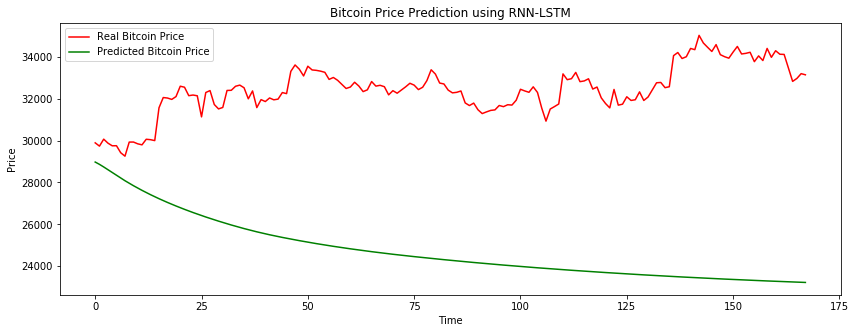

In [82]:
plt.figure(figsize=(14,5))
plt.plot(np.array(real).flat, color = 'red', label = 'Real Bitcoin Price')
plt.plot(np.array(pred).flat, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()